<a href="https://colab.research.google.com/github/jdk8825-beep/3611923_BD2/blob/main/finalrd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#Importing basic libraries required for data analysis and visualization.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [20]:
#Loading CSV datasets into pandas DataFrames.
products=pd.read_csv('/content/products.csv')


In [21]:
#Displaying first few rows to understand dataset structure.
#These datasets contain product information,
products.head()

,Uniq_id,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.000
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.500
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,3.125


In [22]:
#customer reviews.
#Viewing customer review data.
reviews = pd.read_csv('/content/reviews.csv')

In [23]:
reviews.head()

,Uniq_id,Username,Score,Review
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...
3,b6c0b6bea69c722939585baeac73c13d,zeqg1222,0,I love these capris! They fit true to size and...
4,b6c0b6bea69c722939585baeac73c13d,nvfn3212,3,This product is very comfortable and the fabri...


In [24]:
#user details.
#Viewing user information.
users=pd.read_csv('/content/users.csv')

In [25]:
users.head()

,Username,DOB,State
0,bkpn1412,31.07.1983,Oregon
1,gqjs4414,27.07.1998,Massachusetts
2,eehe1434,08.08.1950,Idaho
3,hkxj1334,03.08.1969,Florida
4,jjbd1412,26.07.2001,Georgia


In [26]:
#Checking dataset sizes (rows and columns).

print(products.shape)
print(reviews.shape)
print(users.shape)

(7982, 6)
(39063, 4)
(5000, 3)


In [27]:
#Viewing column names available in each dataset.

print(products.columns)
print(reviews.columns)
print(users.columns)


Index(['Uniq_id', 'SKU', 'Name', 'Description', 'Price', 'Av_Score'], dtype='object')
Index(['Uniq_id', 'Username', 'Score', 'Review'], dtype='object')
Index(['Username', 'DOB', 'State'], dtype='object')


In [28]:
#checking data types and missing values.

products.info()
reviews.info()
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7982 entries, 0 to 7981
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Uniq_id      7982 non-null   object 
 1   SKU          7915 non-null   object 
 2   Name         7982 non-null   object 
 3   Description  7439 non-null   object 
 4   Price        5816 non-null   float64
 5   Av_Score     7982 non-null   float64
dtypes: float64(2), object(4)
memory usage: 374.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39063 entries, 0 to 39062
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Uniq_id   39063 non-null  object
 1   Username  39063 non-null  object
 2   Score     39063 non-null  int64 
 3   Review    39063 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column 

In [29]:
#checking for missing data which may effect analysis.

print("Products missing values:",products.isnull().sum().sum())
print("Reviews missing values:",reviews.isnull().sum().sum())
print("Users missing values:",users.isnull().sum().sum())



Products missing values: 2776
Reviews missing values: 0
Users missing values: 0


In [30]:
#Removing duplicate rows if present.

products=products.drop_duplicates()
reviews=reviews.drop_duplicates()
users=users.drop_duplicates()


In [31]:
reviews_clean=reviews[reviews["Score"]>0]

In [32]:
reviews['Score']=reviews['Score'].fillna(reviews['Score'].mean())

In [33]:
#importing json file
import json

json_products = []
with open("jcpenney_products.json", 'r') as f:
    for line in f:
        if line.strip():  #Ensure the line is not empty
            try:
                json_products.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from line: {line.strip()}")
                print(f"Error: {e}")

json_reviewers = []
with open("jcpenney_reviewers.json", 'r') as f:
    for line in f:
        if line.strip(): #Ensure the line is not empty
            try:
                json_reviewers.append(json.loads(line))
            except json.JSONDecodeError as e:
                print(f"Error decoding JSON from line: {line.strip()}")
                print(f"Error: {e}")

In [34]:
#Converting JSON data into DataFrames for analysis.

json_products_df=pd.DataFrame(json_products)
json_reviewers_df=pd.DataFrame(json_reviewers)
json_products_df.head()


,uniq_id,sku,name_title,description,list_price,sale_price,category,category_tree,average_product_rating,product_url,product_image_urls,brand,total_number_reviews,Reviews,Bought With
0,b6c0b6bea69c722939585baeac73c13d,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'fsdv4141', 'Review': 'You never hav...","[898e42fe937a33e8ce5e900ca7a4d924, 8c02c262567..."
1,93e5272c51d8cce02597e3ce67b7ad0a,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,alfred dunner,jcpenney|women|alfred dunner,3.000,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'tpcu2211', 'Review': 'You never hav...","[bc9ab3406dcaa84a123b9da862e6367d, 18eb69e8fc2..."
2,013e320f2f2ec0cf5b3ff5418d688528,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,2.625,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'pcfg3234', 'Review': 'You never hav...","[3ce70f519a9cfdd85cdbdecd358e5347, b0295c96d2b..."
3,505e6633d81f2cb7400c0cfa0394c427,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.500,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'ngrq4411', 'Review': 'You never hav...","[efcd811edccbeb5e67eaa8ef0d991f7c, 7b2cc00171e..."
4,d969a8542122e1331e304b09f81a83f6,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,You'll return to our Alfred Dunner pull-on cap...,41.09,24.16,view all,jcpenney|women|view all,3.125,http://www.jcpenney.com/alfred-dunner-essentia...,http://s7d9.scene7.com/is/image/JCPenney/DP122...,Alfred Dunner,8,"[{'User': 'nbmi2334', 'Review': 'You never hav...","[0ca5ad2a218f59eb83eec1e248a0782d, 9869fc8da14..."


In [35]:
#Merging product and review datasets using product ID.
#This allows analysis of ratings alongside product details.

merged_data=pd.merge(reviews, products,on="Uniq_id",how="inner")
merged_data.head()

,Uniq_id,Username,Score,Review,SKU,Name,Description,Price,Av_Score
0,b6c0b6bea69c722939585baeac73c13d,fsdv4141,2,You never have to worry about the fit...Alfred...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
1,b6c0b6bea69c722939585baeac73c13d,krpz1113,1,Good quality fabric. Perfect fit. Washed very ...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
2,b6c0b6bea69c722939585baeac73c13d,mbmg3241,2,I do not normally wear pants or capris that ha...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
3,b6c0b6bea69c722939585baeac73c13d,zeqg1222,0,I love these capris! They fit true to size and...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625
4,b6c0b6bea69c722939585baeac73c13d,nvfn3212,3,This product is very comfortable and the fabri...,pp5006380337,Alfred Dunner® Essential Pull On Capri Pant,Youll return to our Alfred Dunner pull-on capr...,41.09,2.625


In [36]:
#Calculating average rating for each product.
avg_rating=merged_data.groupby("Uniq_id")["Score"].mean()
avg_rating.sort_values(ascending=False).head()

,Score
Uniq_id,
2003545d25259d17842141caaca893e8,5.0
d236ba27d0c61a10854cfbfb6bcdf0e4,5.0
8148238f04a2042aa3728856633579ba,5.0
7f944c42a85d4f138049c66bbf02b31f,5.0
235b0e8fdb94f36aa9cc9e8d8293c303,5.0


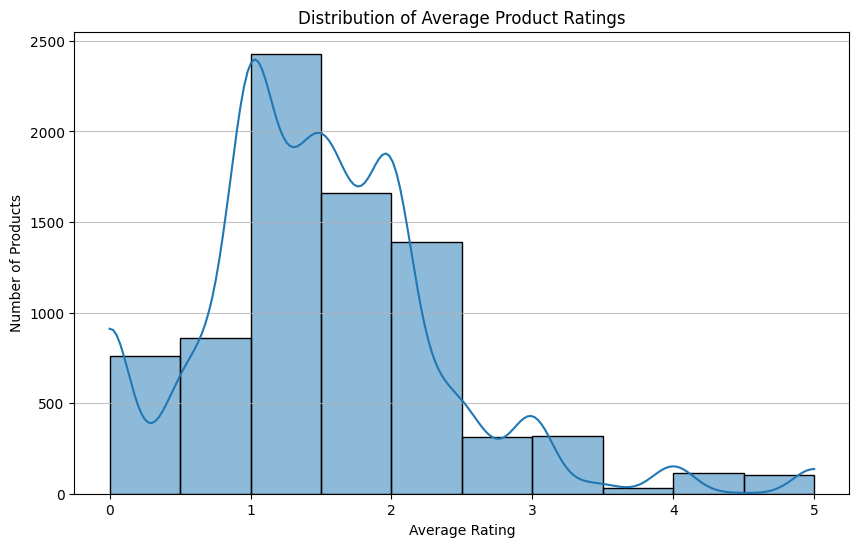

In [37]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(avg_rating, bins=10, kde=True)
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [38]:
#Counting number of reviews per product.
review_counts = merged_data['Uniq_id'].value_counts()
review_counts.head()

,count
Uniq_id,
6c40fb8c09f9b94ef12003656c808cf1,23
2ce274384d293748bbf8bdebbc0aa145,23
7376425db74399716d23f1cc0c59684c,23
867b08603fa032314919f0d7b5d47ad6,22
5749d444e3798826f3df75cfbb629dfb,21


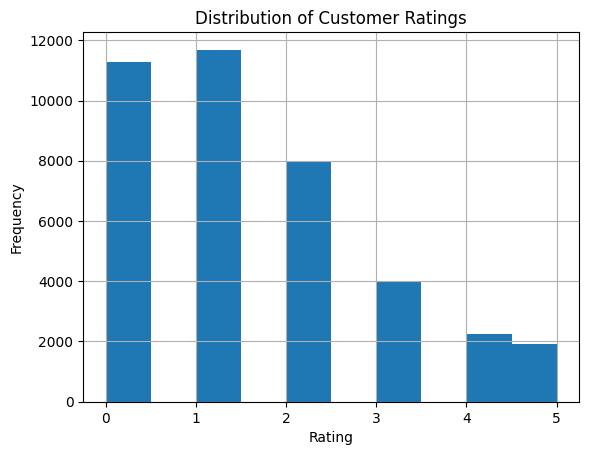

In [39]:
#Plotting distribution of ratings.
plt.figure()
merged_data['Score'].hist()
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


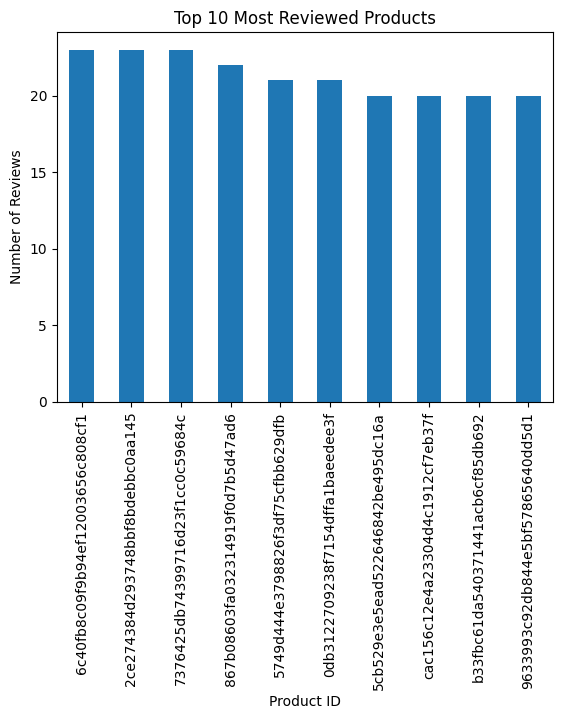

In [40]:
# Top reviewed products visualization.

review_counts.head(10).plot(kind="bar")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Reviews")
plt.show()


In [41]:
#Checking length of reviews as a simple text analysis.
merged_data['review_length'] = merged_data['Review'].astype(str).apply(len)
merged_data[['Review','review_length']].head()

,Review,review_length
0,You never have to worry about the fit...Alfred...,132
1,Good quality fabric. Perfect fit. Washed very ...,59
2,I do not normally wear pants or capris that ha...,261
3,I love these capris! They fit true to size and...,111
4,This product is very comfortable and the fabri...,66


In [42]:
#Average review length by rating Score.
merged_data.groupby("Score")["review_length"].mean()


,review_length
Score,
0,219.552153
1,214.378112
2,184.917431
3,166.582730
4,226.773274
5,257.892219


The results indicate that some products have a significantly larger number of reviews, which reflects higher engagement with customers. The distribution of ratings indicates the overall trend of customer satisfaction. Longer reviews are generally found in extreme ratings, which indicate that customers provide more information when they are highly satisfied or dissatisfied.

This analysis shows how structured and semi-structured retail data can be leveraged to create insights. By integrating product and review data, it is possible to spot trends in product performance and customer behavior that could help with pricing, marketing, and inventory.

In conclusion, it can be stated that the project has been successful in exploring JC Penney data sets using data analysis techniques such as data loading, preparation, integration, visualization, and interpretation. The findings of the project show the importance of customer reviews in the success of products and business strategies.